In [28]:
import numpy as np

#input parameter
n=int(input("Enter the number of blocks:"))

# data generation from the specified normal distribution and matrix formation

#for force at each block
mean1 = 0

std_dev1 = 10
F = np.random.normal(mean1, std_dev1, n)
force_matrix = F.reshape(-1, 1)
print("\n Force Matrix:")         
print(force_matrix)         #required force matrix


#for stiffness of spring
mean2 = 25 #last 2 digit of roll no- 2021meb1325
std_dev2 = 10
K= np.random.normal(mean2, std_dev2, n)

def stiffness_matrix(K):
    K_ = np.zeros((n, n))
    
    # Assign spring constants to the diagonal and off-diagonal elements
    for i in range(1, n+1): 
        for j in range(1, n+1): 
            # For diagonal elements
            if i == j:
                if i == n:  
                    # for the last element 
                    K_[i-1, j-1] = K[i-1]  
                else:
                    K_[i-1, j-1] = K[i-1] + K[i]
            elif abs(i - j) == 1:
                # Off-diagonal elements
                K_[i-1, j-1] = -K[max(i-1, j-1)]  
    
    return K_
                
Stiffness_Matrix=stiffness_matrix(K)
print("\nStiffness Matrix:")
print(Stiffness_Matrix)         #required stiffness matrix

#the governing equation of spring mass system is [m]¨x + [c]˙x + [k]x = f
#the system consists of massless blocks so there is no mass matrix
#also there is no damping involved so no c term

# the final equation for the given scenario: [k]x = f
#displacement of the spring block system
Stiffness_Matrix_inverse = np.linalg.inv(Stiffness_Matrix)
x=np.dot(Stiffness_Matrix_inverse,force_matrix)
y=force_matrix
print("\nDisplacement of blocks:")
print(x)




Enter the number of blocks:5

 Force Matrix:
[[ 13.58821334]
 [  5.69462109]
 [ 11.02336997]
 [-14.89258161]
 [ -1.57920256]]

Stiffness Matrix:
[[ 48.47515743 -23.5542345    0.           0.           0.        ]
 [-23.5542345   55.71367094 -32.15943644   0.           0.        ]
 [  0.         -32.15943644  61.11174964 -28.95231319   0.        ]
 [  0.           0.         -28.95231319  63.22388247 -34.27156928]
 [  0.           0.           0.         -34.27156928  34.27156928]]

Displacement of blocks:
[[ 0.55513274]
 [ 0.56558551]
 [ 0.39616667]
 [-0.17276141]
 [-0.2188405 ]]


In [29]:
#adding noise to displacement if asked to
noise_range = 0.08 # ±8% range
noise = np.random.uniform(low=-noise_range * x, high=noise_range * x) #generating noise between the required range
noisy_x = x + noise #adding it to displacement
print("\nDisplacement of blocks(with noise):")
print(noisy_x)

data = np.column_stack((noisy_x, y))
print("\nInput data with displacement and force values:")
print(data)


Displacement of blocks(with noise):
[[ 0.5791735 ]
 [ 0.53558659]
 [ 0.40171227]
 [-0.16973276]
 [-0.23023057]]

Input data with displacement and force values:
[[  0.5791735   13.58821334]
 [  0.53558659   5.69462109]
 [  0.40171227  11.02336997]
 [ -0.16973276 -14.89258161]
 [ -0.23023057  -1.57920256]]


In [26]:
'''
#for part 4 and 5
Stiffness_Matrix_inverse = np.linalg.inv(Stiffness_Matrix)
#force along the first mode
force1=np.array([-0.21201089, -0.52059953,  0.71596161,  0.37197045,  0.18183638])
#force along vector perpendicular to above vector
force2=np.array([-0.9772673,   0.11294021, -0.15532256, -0.08069623, -0.03944805])
x=np.dot(Stiffness_Matrix_inverse,force)
y=force2
print("\nData- Displacement and Force:")
data = np.column_stack((x, force2))
print(data)
'''

'\n#for part 4 and 5\nStiffness_Matrix_inverse = np.linalg.inv(Stiffness_Matrix)\n#force along the first mode\nforce1=np.array([-0.21201089, -0.52059953,  0.71596161,  0.37197045,  0.18183638])\n#force along vector perpendicular to above vector\nforce2=np.array([-0.9772673,   0.11294021, -0.15532256, -0.08069623, -0.03944805])\nx=np.dot(Stiffness_Matrix_inverse,force)\ny=force2\nprint("\nData- Displacement and Force:")\ndata = np.column_stack((x, force2))\nprint(data)\n'

In [30]:
#PCA approach
r = 3 #the number of dimensions to reduce to ie r (r<n)

'''
def covariance_matrix(data):
    # Standardizing the data, by subtracting the mean value for each column of the data array  
    centered_data = data - np.mean(data, axis=0)
    #computing the covariance matrix
    covariance_matrix = np.dot(np.transpose(centered_data), centered_data) / (len(data) - 1)
    return covariance_matrix

print("\nCovariance Matrix:")
print(covariance_matrix(data))
'''

covariance=np.cov(data)

print("\nCovariance Matrix:")
print(covariance)

# Compute eigenvalues and eigenvectors
#eigenvectors of the covariance matrix of the data
eigenvalues, eigenvectors = np.linalg.eig(covariance)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Selecting the top r eigenvectors corresponding to the largest eigenvalues
top_eigenvectors = sorted_eigenvectors[:, :r]

# Print eigenvalues and eigenvectors
print("\nEigenvalues:", sorted_eigenvalues)
print("\nEigenvectors:",sorted_eigenvectors)


# Performing dimensionality reduction
reduced_data = np.dot( np.transpose(top_eigenvectors),data)

print("Reduced data using PCA:")
print(reduced_data)


Covariance Matrix:
[[ 84.61755886  33.55704271  69.08878413 -95.7650637   -8.77441517]
 [ 33.55704271  13.3078185   27.39874928 -37.97784261  -3.47969652]
 [ 69.08878413  27.39874928  56.40980615 -78.19053045  -7.16415935]
 [-95.7650637  -37.97784261 -78.19053045 108.38113919   9.93035534]
 [ -8.77441517  -3.47969652  -7.16415935   9.93035534   0.90986271]]

Eigenvalues: [ 2.63626185e+02  2.84217094e-14  2.69897294e-15  1.05205952e-16
 -3.79814836e-15]

Eigenvectors: [[-0.56654704 -0.8240294   0.10568704 -0.01160271  0.04421297]
 [-0.22467728  0.15447295  0.56664948  0.05092918 -0.07196524]
 [-0.46257593  0.31803601 -0.76884594 -0.13036898  0.80160038]
 [ 0.64118386 -0.44083478 -0.25230233 -0.1757353   0.58259735]
 [ 0.05874808 -0.04039122 -0.11383353  0.97436781  0.1043234 ]]
Reduced data using PCA:
[[ -0.75664111 -23.71861774]
 [ -0.18263999  -0.18263999]
 [  0.12487807   0.12487807]]


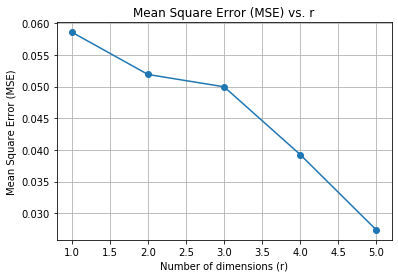

In [31]:
import matplotlib.pyplot as plt
# PCA approach
r = 5  # Maximum r can't be more than the number of observations or 5, whichever is smaller
mse = []  # List to store Mean Squared Error (MSE)

for a in range(1, r+1):
    # Compute covariance matrix
    covariance = np.cov(data)
    eigenvalues, eigenvectors = np.linalg.eig(covariance)

    # Sorting eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Selecting the top r eigenvectors corresponding to the largest eigenvalues
    top_eigenvectors = sorted_eigenvectors[:, :a]

    # Performing dimensionality reduction
    reduced_data = np.dot( np.transpose(top_eigenvectors),data)
    reconstructed_data = np.dot(top_eigenvectors,reduced_data)
    mse.append(np.mean((data - reconstructed_data) ** 2))

# Plot MSE with respect to r
plt.plot(range(1, r+1), mse, marker='o')

plt.title('Mean Square Error (MSE) vs. r')
plt.xlabel('Number of dimensions (r)')
plt.ylabel('Mean Square Error (MSE)')
plt.grid(True)
plt.show()

In [32]:
# Modal analysis

def modal_analysis(displacement, force):
    n = displacement.shape[0]
    
    K = Stiffness_Matrix
    
    eigenvalues, eigenvectors = np.linalg.eig(K)
    
    # Sorting eigenvalues and eigenvectors
    i = eigenvalues.argsort()
    
    ##natural frequencies obtained from modal analysis represent the eigenvalues of the stiffness matrix
    eigenvalues = eigenvalues[i]
    
    #Mode shapes are represented as eigenvectors of the system's stiffness matrix.
    eigenvectors = eigenvectors[:, i]
        
    # Modal participation factor
    # Modal Participation Factor provide information about how much each degree of freedom participates in each mode of vibration.
    MPF = np.abs(eigenvectors)**2 / np.sum(np.abs(eigenvectors)**2, axis=0)
    
    return eigenvalues, eigenvectors, MPF

eigenvalues, eigenvectors, MPF = modal_analysis(noisy_x.flatten(), force_matrix.flatten())

print("\nNatural frequencies:")
print(np.sqrt(eigenvalues))

print("\nMode shapes:")
print(eigenvectors)

print("\nModal Participation Factors:")
print(MPF)


Natural frequencies:
[ 1.45840302  4.46063605  7.04587328  8.99063845 10.50218579]

Mode shapes:
[[-0.1807386  -0.48160882  0.72685585  0.42316559  0.1673259 ]
 [-0.35564358 -0.58432639 -0.03607929 -0.58130204 -0.43916574]
 [-0.46022627 -0.29803193 -0.53917334  0.14408679  0.62281608]
 [-0.54258401  0.22479647 -0.17347965  0.54755483 -0.57022598]
 [-0.5784856   0.53596561  0.38675029 -0.40304036  0.25705636]]

Modal Participation Factors:
[[0.03266644 0.23194706 0.52831942 0.17906912 0.02799796]
 [0.12648235 0.34143733 0.00130172 0.33791206 0.19286654]
 [0.21180822 0.08882303 0.29070789 0.020761   0.38789987]
 [0.2943974  0.05053345 0.03009519 0.29981629 0.32515766]
 [0.33464558 0.28725913 0.14957579 0.16244153 0.06607797]]
